In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import missingno as ms
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('../input/apparent-temperature-prediction/weather_data.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
5994,2006-05-15 19:00:00.000 +0200,Partly Cloudy,rain,19.094444,19.094444,0.60,6.9391,350,11.2056,0,1020.07,Partly cloudy until night.
5995,2006-05-15 20:00:00.000 +0200,Partly Cloudy,rain,17.655556,17.655556,0.62,1.6100,56,10.3523,0,1020.44,Partly cloudy until night.
5996,2006-05-15 21:00:00.000 +0200,Partly Cloudy,rain,15.072222,15.072222,0.78,1.9481,170,9.9820,0,1020.99,Partly cloudy until night.
5997,2006-05-15 22:00:00.000 +0200,Partly Cloudy,rain,13.405556,13.405556,0.83,3.1073,201,15.8263,0,1021.50,Partly cloudy until night.
5998,2006-05-15 23:00:00.000 +0200,Clear,rain,12.927778,12.927778,0.90,2.7531,191,14.9569,0,1021.64,Partly cloudy until night.


In [4]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [5]:
data = data.drop(['Summary', 'Precip Type','Loud Cover', 'Daily Summary','Wind Bearing (degrees)'],axis =1)

In [6]:
data['temp. difference'] = (data['Temperature (C)'] - data['Apparent Temperature (C)'])

In [7]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

In [8]:
data.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),temp. difference
0,2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89,14.1197,15.8263,1015.13,2.083333
1,2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86,14.2646,15.8263,1015.63,2.127778
2,2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284,14.9569,1015.94,0.000000
3,2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83,14.1036,15.8263,1016.41,2.344444
4,2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83,11.0446,15.8263,1016.51,1.777778


In [9]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),temp. difference
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,9.476875,997.359828,1.259037
std,10.565425,11.923712,0.173051,6.536619,4.038583,145.173638,1.907506
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,-3.566667
25%,1.094444,-1.538889,0.680000,4.878300,6.906900,1012.060000,0.000000
50%,10.050000,10.050000,0.830000,9.064300,9.982000,1016.840000,0.000000
75%,18.722222,18.722222,0.920000,13.395200,11.270000,1022.490000,2.675000
max,34.005556,36.400000,1.000000,45.933300,16.100000,1045.140000,10.183333


In [10]:
data.dtypes

Formatted Date               object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Visibility (km)             float64
Pressure (millibars)        float64
temp. difference            float64
dtype: object

In [11]:
indexdata = data.sort_values(by = ['Formatted Date'])
indexdata = indexdata.set_index('Formatted Date')
indexdata.index
indexdata.index.drop_duplicates(keep='first')
indexdata.dropna()
indexdata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),temp. difference
Formatted Date,,,,,,,
2006-01-01 00:00:00+01:00,0.577778,-4.050000,0.89,17.1143,9.9820,1016.66,4.627778
2006-01-01 01:00:00+01:00,1.161111,-3.238889,0.85,16.6152,9.9015,1016.15,4.400000
2006-01-01 02:00:00+01:00,1.666667,-3.155556,0.82,20.2538,9.9015,1015.87,4.822222
2006-01-01 03:00:00+01:00,1.711111,-2.194444,0.82,14.4900,9.9015,1015.56,3.905556
2006-01-01 04:00:00+01:00,1.183333,-2.744444,0.86,13.9426,9.9015,1014.98,3.927778


In [12]:
data = indexdata
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),temp. difference
Formatted Date,,,,,,,
2006-01-01 00:00:00+01:00,0.577778,-4.050000,0.89,17.1143,9.9820,1016.66,4.627778
2006-01-01 01:00:00+01:00,1.161111,-3.238889,0.85,16.6152,9.9015,1016.15,4.400000
2006-01-01 02:00:00+01:00,1.666667,-3.155556,0.82,20.2538,9.9015,1015.87,4.822222
2006-01-01 03:00:00+01:00,1.711111,-2.194444,0.82,14.4900,9.9015,1015.56,3.905556
2006-01-01 04:00:00+01:00,1.183333,-2.744444,0.86,13.9426,9.9015,1014.98,3.927778


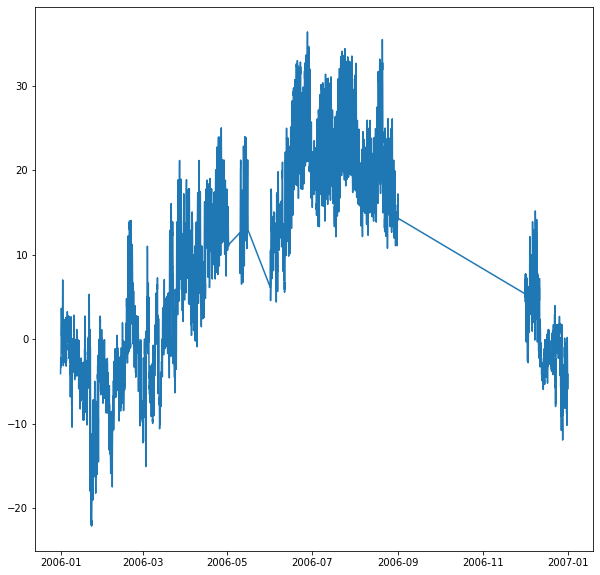

In [13]:
fig = plt.figure(figsize=(10,10))
plt.plot(data['Apparent Temperature (C)'])

In [14]:
data.index = pd.to_datetime(indexdata.index,utc =True)
data2 = data.resample(rule='D').mean()
data2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),temp. difference
Formatted Date,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,9.982000,1016.660000,4.627778
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,11.348487,1011.985000,4.249537
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,8.492079,1010.384167,3.454398
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,9.223958,1021.170833,1.895139
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,8.352546,981.770833,2.915046


In [15]:
data2.isnull().sum()

Temperature (C)             112
Apparent Temperature (C)    112
Humidity                    112
Wind Speed (km/h)           112
Visibility (km)             112
Pressure (millibars)        112
temp. difference            112
dtype: int64

In [16]:
data2.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Visibility (km)             float64
Pressure (millibars)        float64
temp. difference            float64
dtype: object

In [17]:
data2.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),temp. difference
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,10.163863,8.900450,0.780951,10.002588,9.506416,997.655220,1.263413
std,10.001123,11.336094,0.111037,4.676436,3.127775,72.760396,1.637804
min,-11.469444,-18.281944,0.482083,2.543129,0.213996,381.667500,-0.942593
25%,0.771296,-1.507639,0.684583,6.796045,8.142072,1009.569271,0.000000
50%,10.893403,10.139699,0.789792,8.913362,10.760502,1016.207083,0.503472
75%,18.841435,18.841435,0.874271,12.188371,11.821257,1021.393646,2.249884
max,27.450000,28.388657,0.984167,31.941729,15.826300,1043.514583,7.036806


In [18]:
data2 = data2.fillna(data2.mean())

In [19]:
data2.head()
data2.astype(int)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),temp. difference
Formatted Date,,,,,,,
2005-12-31 00:00:00+00:00,0,-4,0,17,9,1016,4
2006-01-01 00:00:00+00:00,4,0,0,21,11,1011,4
2006-01-02 00:00:00+00:00,5,1,0,17,8,1010,3
2006-01-03 00:00:00+00:00,2,0,0,7,9,1021,1
2006-01-04 00:00:00+00:00,2,0,0,12,8,981,2
...,...,...,...,...,...,...,...
2006-12-27 00:00:00+00:00,-1,-4,0,7,10,1036,2
2006-12-28 00:00:00+00:00,-4,-7,0,7,0,1030,2
2006-12-29 00:00:00+00:00,-1,-3,0,7,4,1031,2


In [20]:
winter = data2['2006-01-01' : '2006-02-28']
winter2 =data2['2006-12-01' : '2006-12-31']
spring = data2['2006-03-01' : '2006-05-31']
summer = data2['2006-06-01' : '2006-08-31']

<AxesSubplot:xlabel='Formatted Date'>

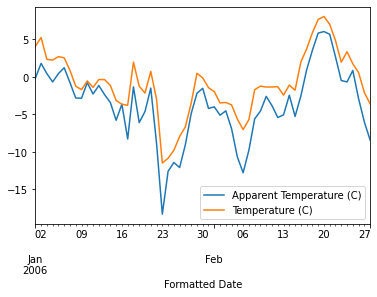

In [21]:
winter.plot(y=['Apparent Temperature (C)' ,'Temperature (C)'])

#plt.plot(winter2['Apparent Temperature (C)'], winter2['Temperature (C)'])

<AxesSubplot:xlabel='Formatted Date'>

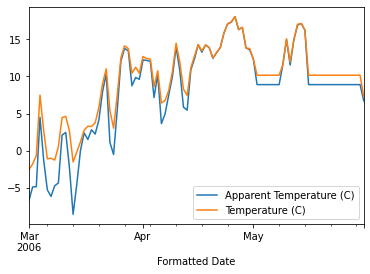

In [22]:
spring.plot(y=['Apparent Temperature (C)' ,'Temperature (C)'])

<AxesSubplot:xlabel='Formatted Date'>

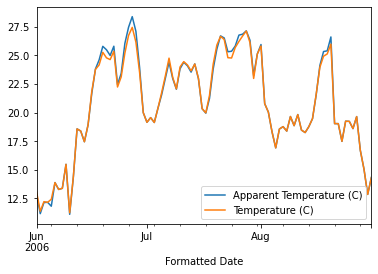

In [23]:
summer.plot(y=['Apparent Temperature (C)' ,'Temperature (C)'])

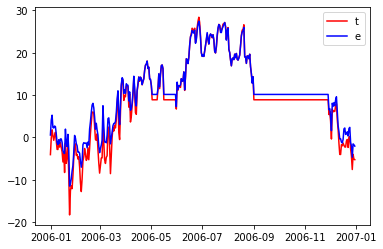

In [24]:
plt.plot(data2['Apparent Temperature (C)'],color ='red')
plt.legend('apparent_temp.')
plt.plot(data2['Temperature (C)'],color ='blue')
plt.legend('temperature')

<AxesSubplot:>

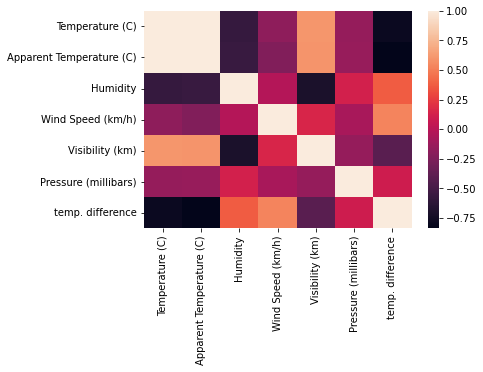

In [25]:
data2.corr()
sns.heatmap(data2.corr())

In [26]:
y = data2['Apparent Temperature (C)']
x= data2.drop('Apparent Temperature (C)',axis =1)

In [27]:
x.shape, y.shape

((366, 6), (366,))

In [28]:
from sklearn.model_selection import train_test_split , cross_val_score

In [29]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [30]:
def model_train(model,x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y)
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    score = model.score(x_test,y_test)
    print('model score ' , score)
    
    val_score = cross_val_score(model,x,y,cv=5)
    print('cross val score' ,np.mean(val_score))
    
    error = mean_squared_error(y_test,predict)
    print('error = ',error)
    dataframe = pd.DataFrame({'actual': y_test, 'predicted': predict})
    print(dataframe)
    

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_train(model,x,y)

model score  1.0
cross val score 1.0
error =  2.1592555130900174e-26
                              actual  predicted
Formatted Date                                 
2006-04-04 00:00:00+00:00   7.168519   7.168519
2006-12-29 00:00:00+00:00  -3.975463  -3.975463
2006-01-09 00:00:00+00:00  -2.840046  -2.840046
2006-04-19 00:00:00+00:00  13.880324  13.880324
2006-02-18 00:00:00+00:00   3.554398   3.554398
...                              ...        ...
2006-07-15 00:00:00+00:00  22.950000  22.950000
2006-04-12 00:00:00+00:00   5.869213   5.869213
2006-09-22 00:00:00+00:00   8.900450   8.900450
2006-11-01 00:00:00+00:00   8.900450   8.900450
2006-01-14 00:00:00+00:00  -3.412037  -3.412037

[92 rows x 2 columns]


In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model_train(model,x,y)

model score  0.9970820910110922
cross val score 0.9135690905083834
error =  0.23650877103007706
                              actual  predicted
Formatted Date                                 
2006-04-23 00:00:00+00:00  15.818519  15.734120
2006-02-23 00:00:00+00:00  -0.474074  -0.711866
2006-06-05 00:00:00+00:00  11.823148  11.892329
2006-04-02 00:00:00+00:00  12.157176  12.259422
2006-08-05 00:00:00+00:00  16.921296  17.139030
...                              ...        ...
2006-04-04 00:00:00+00:00   7.168519   7.400261
2006-07-10 00:00:00+00:00  23.834028  23.798025
2006-07-16 00:00:00+00:00  20.344676  20.016586
2006-06-11 00:00:00+00:00  14.379398  14.346954
2006-10-20 00:00:00+00:00   8.900450   8.900450

[92 rows x 2 columns]


In [33]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model_train(model,x,y)

model score  0.9937106502491273
cross val score 0.8862172369851606
error =  0.5368465749630721
                              actual  predicted
Formatted Date                                 
2006-12-14 00:00:00+00:00  -4.011806  -3.997222
2006-07-28 00:00:00+00:00  27.148148  28.388657
2006-06-14 00:00:00+00:00  17.457176  17.490741
2006-09-17 00:00:00+00:00   8.900450   8.900450
2006-08-06 00:00:00+00:00  18.567130  18.607407
...                              ...        ...
2006-04-06 00:00:00+00:00   3.659491   0.933102
2006-04-02 00:00:00+00:00  12.157176  12.379630
2006-10-20 00:00:00+00:00   8.900450   8.900450
2006-10-02 00:00:00+00:00   8.900450   8.900450
2006-06-23 00:00:00+00:00  22.449306  22.044676

[92 rows x 2 columns]


In [34]:
from xgboost import XGBRegressor

model = XGBRegressor()

model_train(model,x,y)

model score  0.9973356003220722
cross val score 0.937610201215227
error =  0.26116983940580507
                              actual  predicted
Formatted Date                                 
2006-07-09 00:00:00+00:00  22.044676  21.909281
2006-07-10 00:00:00+00:00  23.834028  24.013474
2006-01-08 00:00:00+00:00  -2.805093  -2.987448
2006-07-12 00:00:00+00:00  24.095139  24.179600
2006-07-27 00:00:00+00:00  26.854167  26.590902
...                              ...        ...
2006-03-31 00:00:00+00:00   9.617824   9.306301
2006-03-10 00:00:00+00:00   2.109722   2.477387
2006-11-04 00:00:00+00:00   8.900450   8.900398
2006-11-20 00:00:00+00:00   8.900450   8.900398
2006-08-09 00:00:00+00:00  19.659028  19.937241

[92 rows x 2 columns]


In [35]:
#for xgboost only

from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [10,20],
           'colsample_bytree': [0.3, 0.7]}

clf = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   verbose=1)
clf.fit(x, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 20}
Lowest RMSE:  5.988123592915676
